In [15]:
import geopandas as gpd 

In [16]:
segmentized_sidewalks = gpd.read_parquet('../data/nyc/processed/segmentized_with_widths.parquet')

In [17]:
og_sidewalk = gpd.read_file("../data/nyc/_raw/Sidewalk.geojson").to_crs("EPSG:2263")

In [18]:
ct_nyc = gpd.read_file("../data/nyc/geo/ct-nyc-2020.geojson").sample(n=1, random_state=46)
ct_nyc = ct_nyc.to_crs(segmentized_sidewalks.crs)

In [19]:
ct_nyc

,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape__Area,Shape__Length,geometry
1129,1130,104.01,3,Brooklyn,010401,3010401,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,"POLYGON ((982249.679 171630.764, 982088.125 17..."


In [20]:
# Get the intersection of the sidewalks with the CT
intersected_sidewalks = gpd.overlay(segmentized_sidewalks, ct_nyc, how='intersection')

In [21]:
intersected_og_sidewalk = gpd.overlay(og_sidewalk, ct_nyc, how='intersection')

In [22]:
intersected_sidewalks

,index,point_adjacent_ids,point_adjacency_count,width,adjacent_ids,adjacency_count,OBJECTID,CTLabel,BoroCode,BoroName,...,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape__Area,Shape__Length,geometry
0,195364,[],0,22.316219,[90993],1,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981032.704 171295.319)
1,195365,[],0,11.256491,"[91005, 90996]",2,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981727.091 171016.6)
2,195366,[195367],1,7.849390,"[90995, 90997]",2,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981687.121 171052.917)
3,195367,"[195366, 195368]",2,7.849390,"[90995, 90997]",2,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981650.064 171082.241)
4,195368,"[195367, 195369]",2,7.849390,"[90995, 90997]",2,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981613.008 171111.564)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,211762,[211761],1,7.912017,[],0,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981949.189 171560.193)
164,211810,[211811],1,8.982499,[],0,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981889.023 171889.457)
165,211811,"[211810, 211812]",2,8.982499,[],0,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981918.491 171866.212)
166,211812,"[211811, 211813]",2,8.982499,[],0,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981947.96 171842.966)


In [23]:
segmentized_sidewalks

,index,point_adjacent_ids,point_adjacency_count,width,adjacent_ids,adjacency_count,geometry
0,0,"[77, 1]",2,15.845369,"[1, 49]",2,POINT (917063.723 121024.064)
1,1,"[77, 2, 0]",3,15.845369,"[1, 49]",2,POINT (917051.638 121014.569)
2,2,"[1, 3]",2,9.071345,"[2, 0]",2,POINT (917021.592 120979.899)
3,3,"[2, 4]",2,9.071345,"[2, 0]",2,POINT (916991.545 120945.229)
4,4,"[5, 3]",2,9.071345,"[2, 0]",2,POINT (916961.499 120910.56)
...,...,...,...,...,...,...,...
1310236,1310236,"[1310235, 1310237]",2,13.724874,[683045],1,POINT (1060730.102 218580.198)
1310237,1310237,"[1310236, 1310238]",2,13.724874,[683045],1,POINT (1060701.096 218540.689)
1310238,1310238,"[1310237, 1310239]",2,13.724874,[683045],1,POINT (1060672.09 218501.181)
1310239,1310239,"[1310238, 1310240]",2,13.724874,[683045],1,POINT (1060643.084 218461.672)


In [24]:
segmentized_sidewalks['point_adjacency_count'].describe([0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).to_frame().T

,count,mean,std,min,0.1%,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
point_adjacency_count,1310241.0,1.737989,0.541648,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,7.0


In [25]:
import matplotlib.pyplot as plt 

In [26]:
intersected_sidewalks

,index,point_adjacent_ids,point_adjacency_count,width,adjacent_ids,adjacency_count,OBJECTID,CTLabel,BoroCode,BoroName,...,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape__Area,Shape__Length,geometry
0,195364,[],0,22.316219,[90993],1,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981032.704 171295.319)
1,195365,[],0,11.256491,"[91005, 90996]",2,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981727.091 171016.6)
2,195366,[195367],1,7.849390,"[90995, 90997]",2,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981687.121 171052.917)
3,195367,"[195366, 195368]",2,7.849390,"[90995, 90997]",2,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981650.064 171082.241)
4,195368,"[195367, 195369]",2,7.849390,"[90995, 90997]",2,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981613.008 171111.564)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,211762,[211761],1,7.912017,[],0,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981949.189 171560.193)
164,211810,[211811],1,8.982499,[],0,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981889.023 171889.457)
165,211811,"[211810, 211812]",2,8.982499,[],0,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981918.491 171866.212)
166,211812,"[211811, 211813]",2,8.982499,[],0,1130,104.01,3,Brooklyn,...,E,Sunset Park (Central),BK0703,BK07,BK07 Sunset Park-Windsor Terrace (CD 7 Approxi...,36047010401,4307,819191.311188,3662.092826,POINT (981947.96 171842.966)


In [27]:
intersected_sidewalks = intersected_sidewalks.set_index('index')

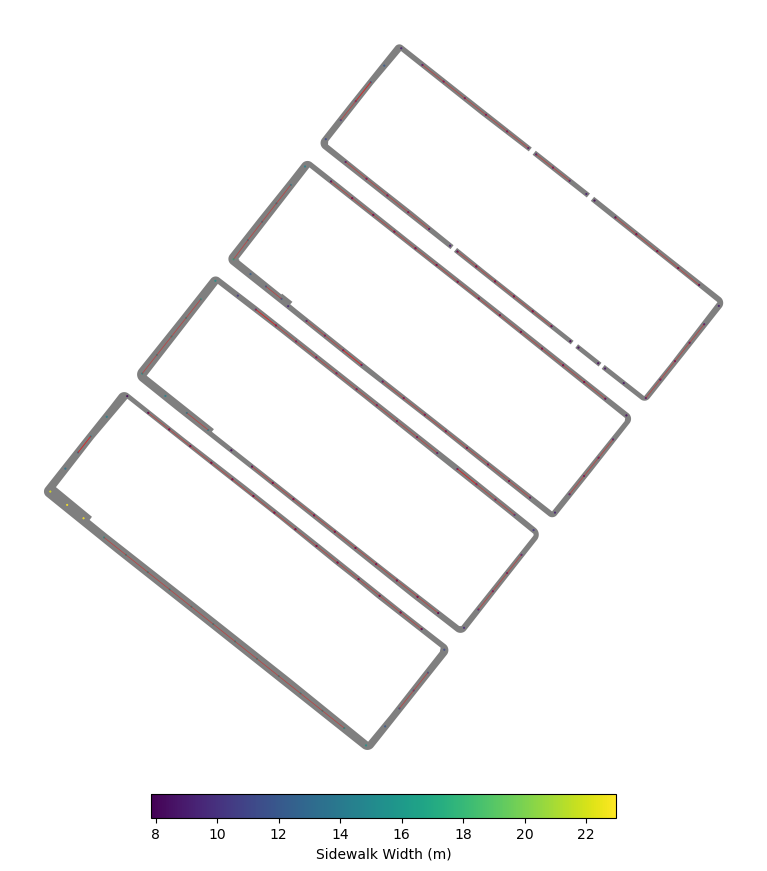

In [28]:
fig, ax = plt.subplots(figsize=(12,12))

DRAW_OG_SIDEWALK=True 
if DRAW_OG_SIDEWALK:
    intersected_og_sidewalk.plot(ax=ax, color='black', linewidth=0.5, alpha=0.5)

intersected_sidewalks.plot(ax=ax, column='width', cmap='viridis', legend=True, markersize=0.25, alpha=1,
    legend_kwds={'label': "Sidewalk Width (m)", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.01})

# draw lines connecting adjacent points as defined in 'point_adjacent_ids'
DRAW_ADJ=True 
if DRAW_ADJ:
    for _, row in intersected_sidewalks.iterrows():
        for i in range(len(row['point_adjacent_ids']) - 1):
            point1 = row['geometry']
            try: 
                point2 = intersected_sidewalks.loc[row['point_adjacent_ids'][i]]['geometry']
            except KeyError:
                print(f"KeyError: {row['point_adjacent_ids'][i]} not found in index")
            ax.plot([point1.x, point2.x], [point1.y, point2.y], color='red', linewidth=0.5, alpha=0.5)

ax.axis('off')

plt.savefig('./_debug_figs/segmentized_sidewalks.png', dpi=300, bbox_inches='tight', pad_inches=0.1)